In [1]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv_imshow
# version check
cv.__version__

'3.4.3'

In [3]:
## Creating a function to download img from a url specified by the USER
import urllib.request as urlrequest

def dl_img(url, file_path, file_name):
  _path = file_path + file_name + '.jpg'
  urlrequest.urlretrieve(url, _path)
  
url = input("URL: ")
saveas = input("File Name: ")

dl_img(url, '/content/', saveas)

# https://cdn.shopify.com/s/files/1/1893/0477/products/5PCS_Framed_Colorful_Lion_Canvas_Prints_grande.png?v=1504331897
# https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_piecharts_thumb.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_001.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter3d_001.png
# https://www.mathworks.com/help/examples/matlabmobile/win64/Scatter3DPlotExample_01.png

URL: https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
File Name: abstract_painting


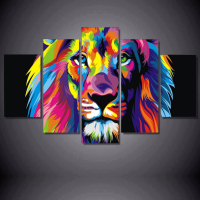

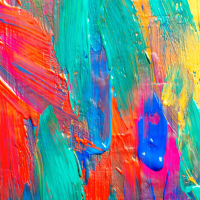

In [49]:
# load an img
# img1 = cv.imread('3D_scatterplot.jpg', 1)
# img2 = cv.imread('blob_scatterplot.jpg', 1)
img1 = cv.imread('abstract_lion.jpg', 1)
img2 = cv.imread('abstract_painting.jpg', 1)

# resizing imgs. to same size & display the img.
imgr1 = cv.resize(img1, (200, 200), interpolation = cv.INTER_AREA)
imgr2 = cv.resize(img2, (200,200), interpolation = cv.INTER_AREA)

cv_imshow(imgr1)
cv_imshow(imgr2)


* ADDING two Images 
>  +(add operator):   Retains their OPAQUENESS

  > cv.add(): adds each of the pixel values e.g: (155,211,79) + (50,170,200) = (205,381,279) ---> (205,255,255) 
  
  > cv.addWeighted(img1, img1_weight, img2, img2_weight, gamma)
     *  gamma {float} = measurement of light (0: no light added) 
     
 > cv.threshold(gray_imgr1, threshold, max, thresholding_types)
 * thresholding_types = cv.THRESH_BIN(_INV) 
 * SUPER-IMPOSING - Masking returns an img. with either 0/1 values which can then be used to extract only those values from the original img. & then impose on another...Basically, removing the background from the imgr1

img1= (200, 200, 3) img2= (200, 200, 3)
+img = (200, 200, 3)


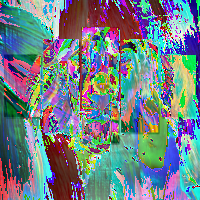

In [5]:
print("img1=",imgr1.shape,"img2=",imgr2.shape)

# Adding two imgs. using +                          
add_using_plus = imgr1 + imgr2

print("+img =",add_using_plus.shape)
cv_imshow(add_using_plus)

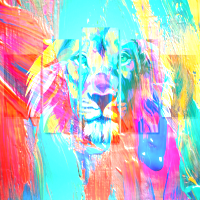

In [6]:
# Adding two imgs. using cv.add()
add_using_func = cv.add(imgr1, imgr2)

cv_imshow(add_using_func)

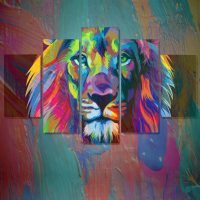

In [7]:
# Adding two imgs. using cv.addWeighted()
add_using_weights = cv.addWeighted(imgr1, 0.7, imgr2, 0.3, 0)

cv_imshow(add_using_weights)

In [26]:
help(cv.bitwise_and)

Help on built-in function bitwise_and:

bitwise_and(...)
    bitwise_and(src1, src2[, dst[, mask]]) -> dst
    .   @brief computes bitwise conjunction of the two arrays (dst = src1 & src2)
    .   Calculates the per-element bit-wise conjunction of two arrays or an
    .   array and a scalar.
    .   
    .   The function cv::bitwise_and calculates the per-element bit-wise logical conjunction for:
    .   *   Two arrays when src1 and src2 have the same size:
    .   \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
    .   *   An array and a scalar when src2 is constructed from Scalar or has
    .   the same number of elements as `src1.channels()`:
    .   \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} \quad \texttt{if mask} (I) \ne0\f]
    .   *   A scalar and an array when src1 is constructed from Scalar or has
    .   the same number of elements as `src2.channels()`:
    .   \f[\texttt{dst} (I) =  \texttt{src1}  \wed

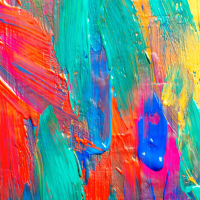

ROI= (200, 200, 3)


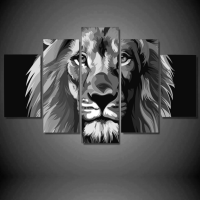

RET (threshold)= 130.0


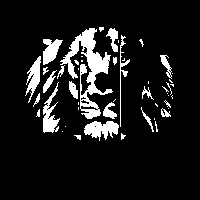

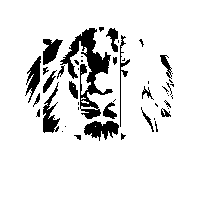

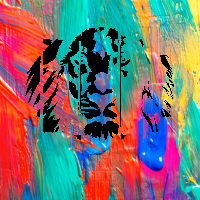

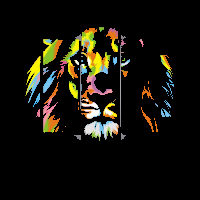

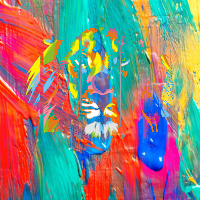

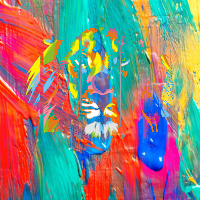

In [50]:
## Super-imposing two imgs. using roi

# SAVE 
rows,columns,channels = imgr2.shape

# print(rows,columns,channels)

# Take the complete img.(resized) as roi (super-imposing the complete img. onto another)
# roi = imgr2[0:rows, 0:columns]
roi = imgr2[ :, :]

cv_imshow(roi)
print("ROI=", roi.shape)

# MASK: Initial conversion to GRAYSCALE
gray_imgr1 = cv.cvtColor(imgr1, cv.COLOR_BGR2GRAY)

cv_imshow(gray_imgr1)

# applying THRESHOLD above which all pixels values are converted to 255(1/white) and below it to 0(0/black) and vice-versa for THRESH_BINARY_INV
# help(cv.threshold)
ret, mask = cv.threshold(gray_imgr1, 130, 255, cv.THRESH_BINARY)

print("RET (threshold)=",ret)
cv_imshow(mask)

# Conversion from WHITE(LION) & BLACK(background) --> WHITE(background) & BLACK(LION)
mask_inv = cv.bitwise_not(mask)
# help(cv.bitwise_and)
cv_imshow(mask_inv)

# superimposing foreground of imgr1(LION) on the background of the imgr2(painting)
imgr2_bg = cv.bitwise_and(roi, roi, mask=mask_inv)
cv_imshow(imgr2_bg)

# extracting true(reqd.) foreground from the imgr1 using the boundaries defined by the mask calculated  
imgr1_fg = cv.bitwise_and(imgr1, imgr1, mask=mask)
cv_imshow(imgr1_fg)

# imgr1_fg_better = cv.bitwise_and(imgr1, imgr1, mask=mask_inv)
# cv_imshow(imgr1_fg_better)

dst = cv.add(imgr2_bg, imgr1_fg)
cv_imshow(dst)

imgr2[ :, :] = dst
cv_imshow(dst)
